# SOM zur Visualisierung der Daten

## 1. Vorbereitungen

In [1]:
%run -i ./scripts/PythonImports.py

In [2]:
%run -i ./scripts/EvalPreperations.py

Set configs..
Read the data..
Shape of normal data: (105216, 17)
Shape of anormal data: (35040, 18)
Save label..
Scale data..
Prepare data for PyTorch..


## 2. Training der SOM

## Normale Daten

In [6]:
import SimpSOM as sps

In [8]:
net = sps.somNet(20, 20, scaled_normal, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


In [9]:
net.train(0.01, 10000)

Training SOM... done!


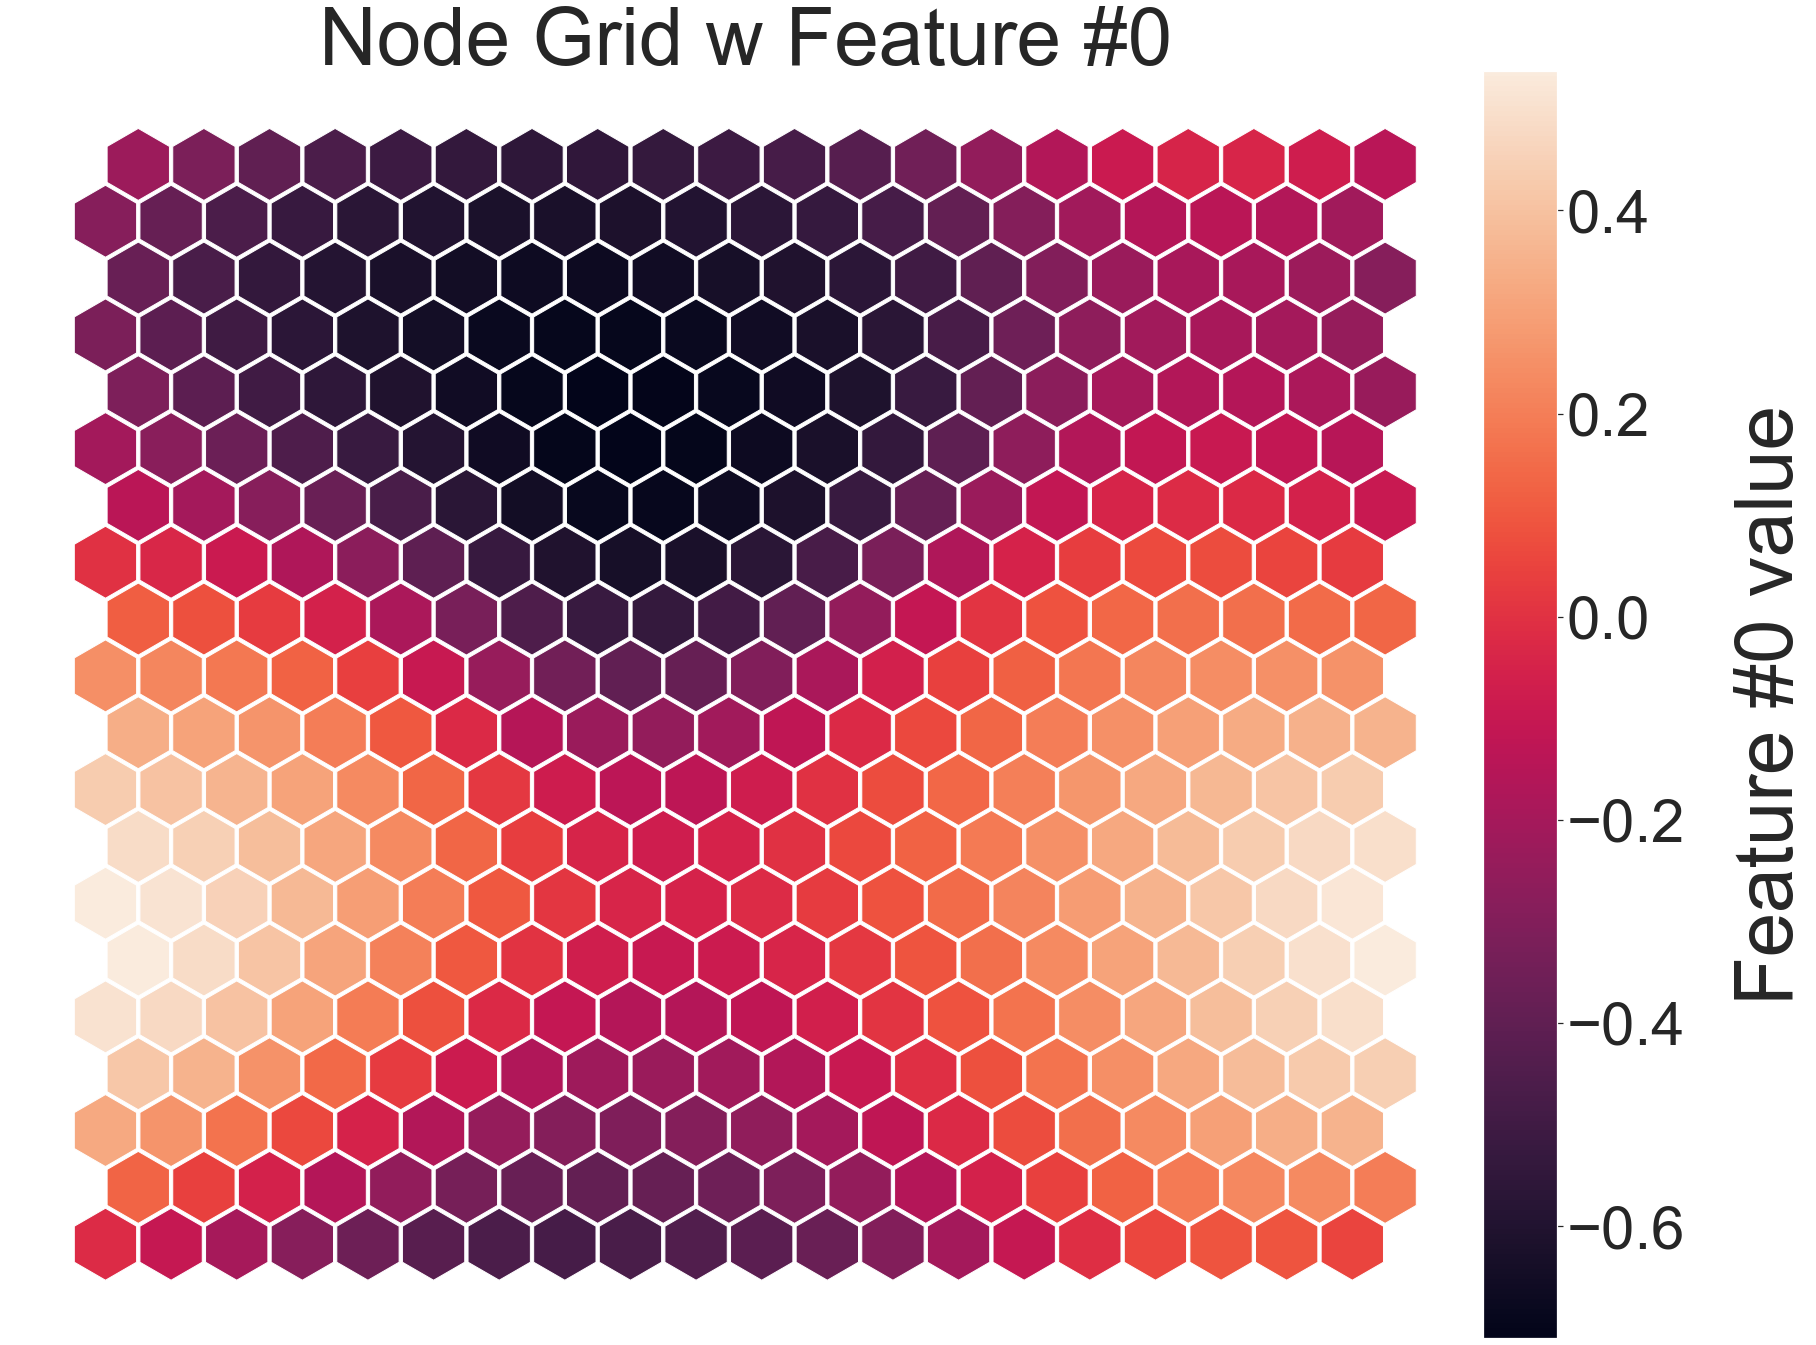

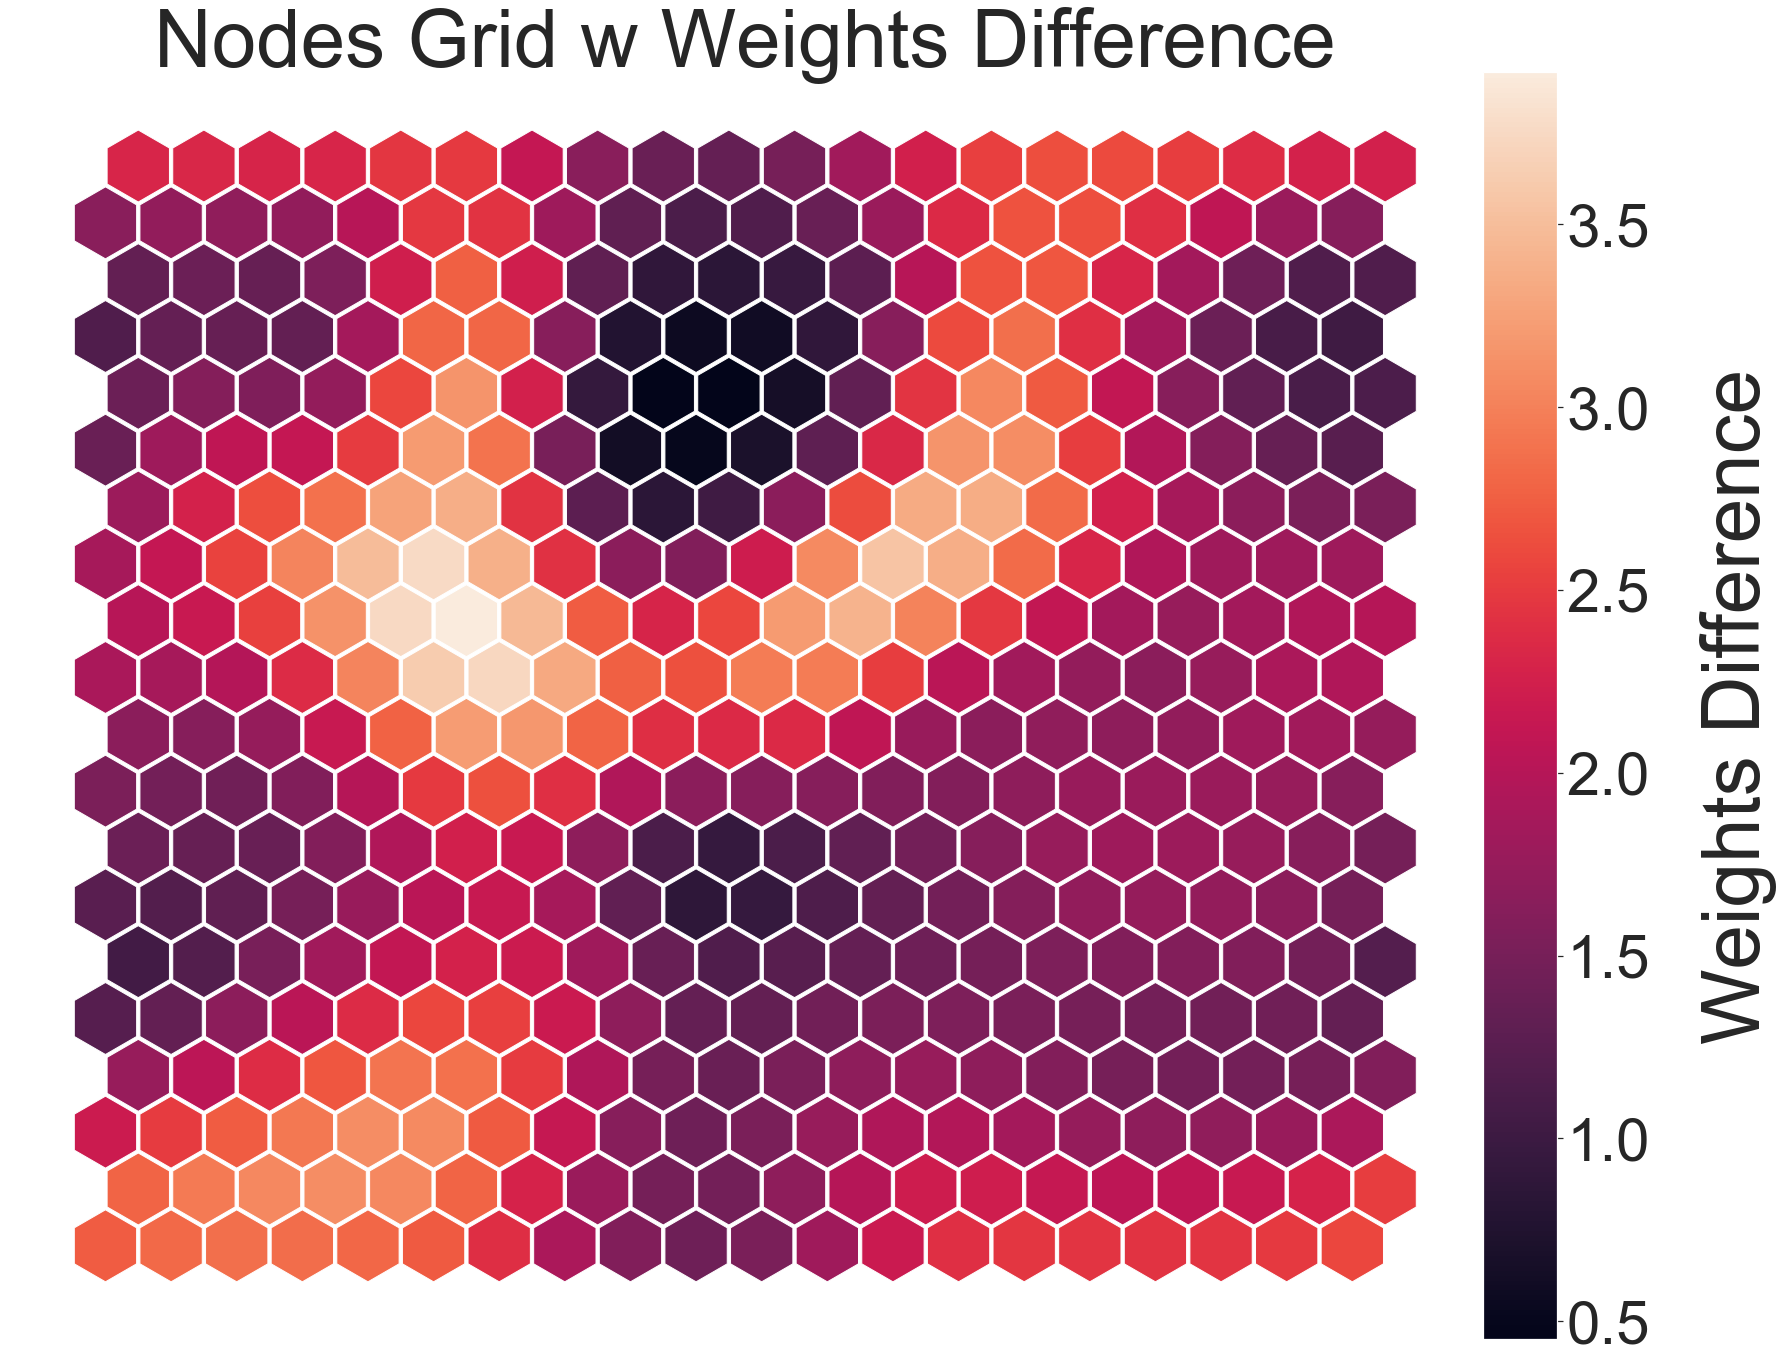

In [10]:
net.nodes_graph(colnum=0, path=fig_path)
net.diff_graph(path=fig_path)

## Anormale Daten

In [11]:
netAnormal = sps.somNet(20, 20, scaled_anormal, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


In [12]:
netAnormal.train(0.01, 10000)

Training SOM... done!


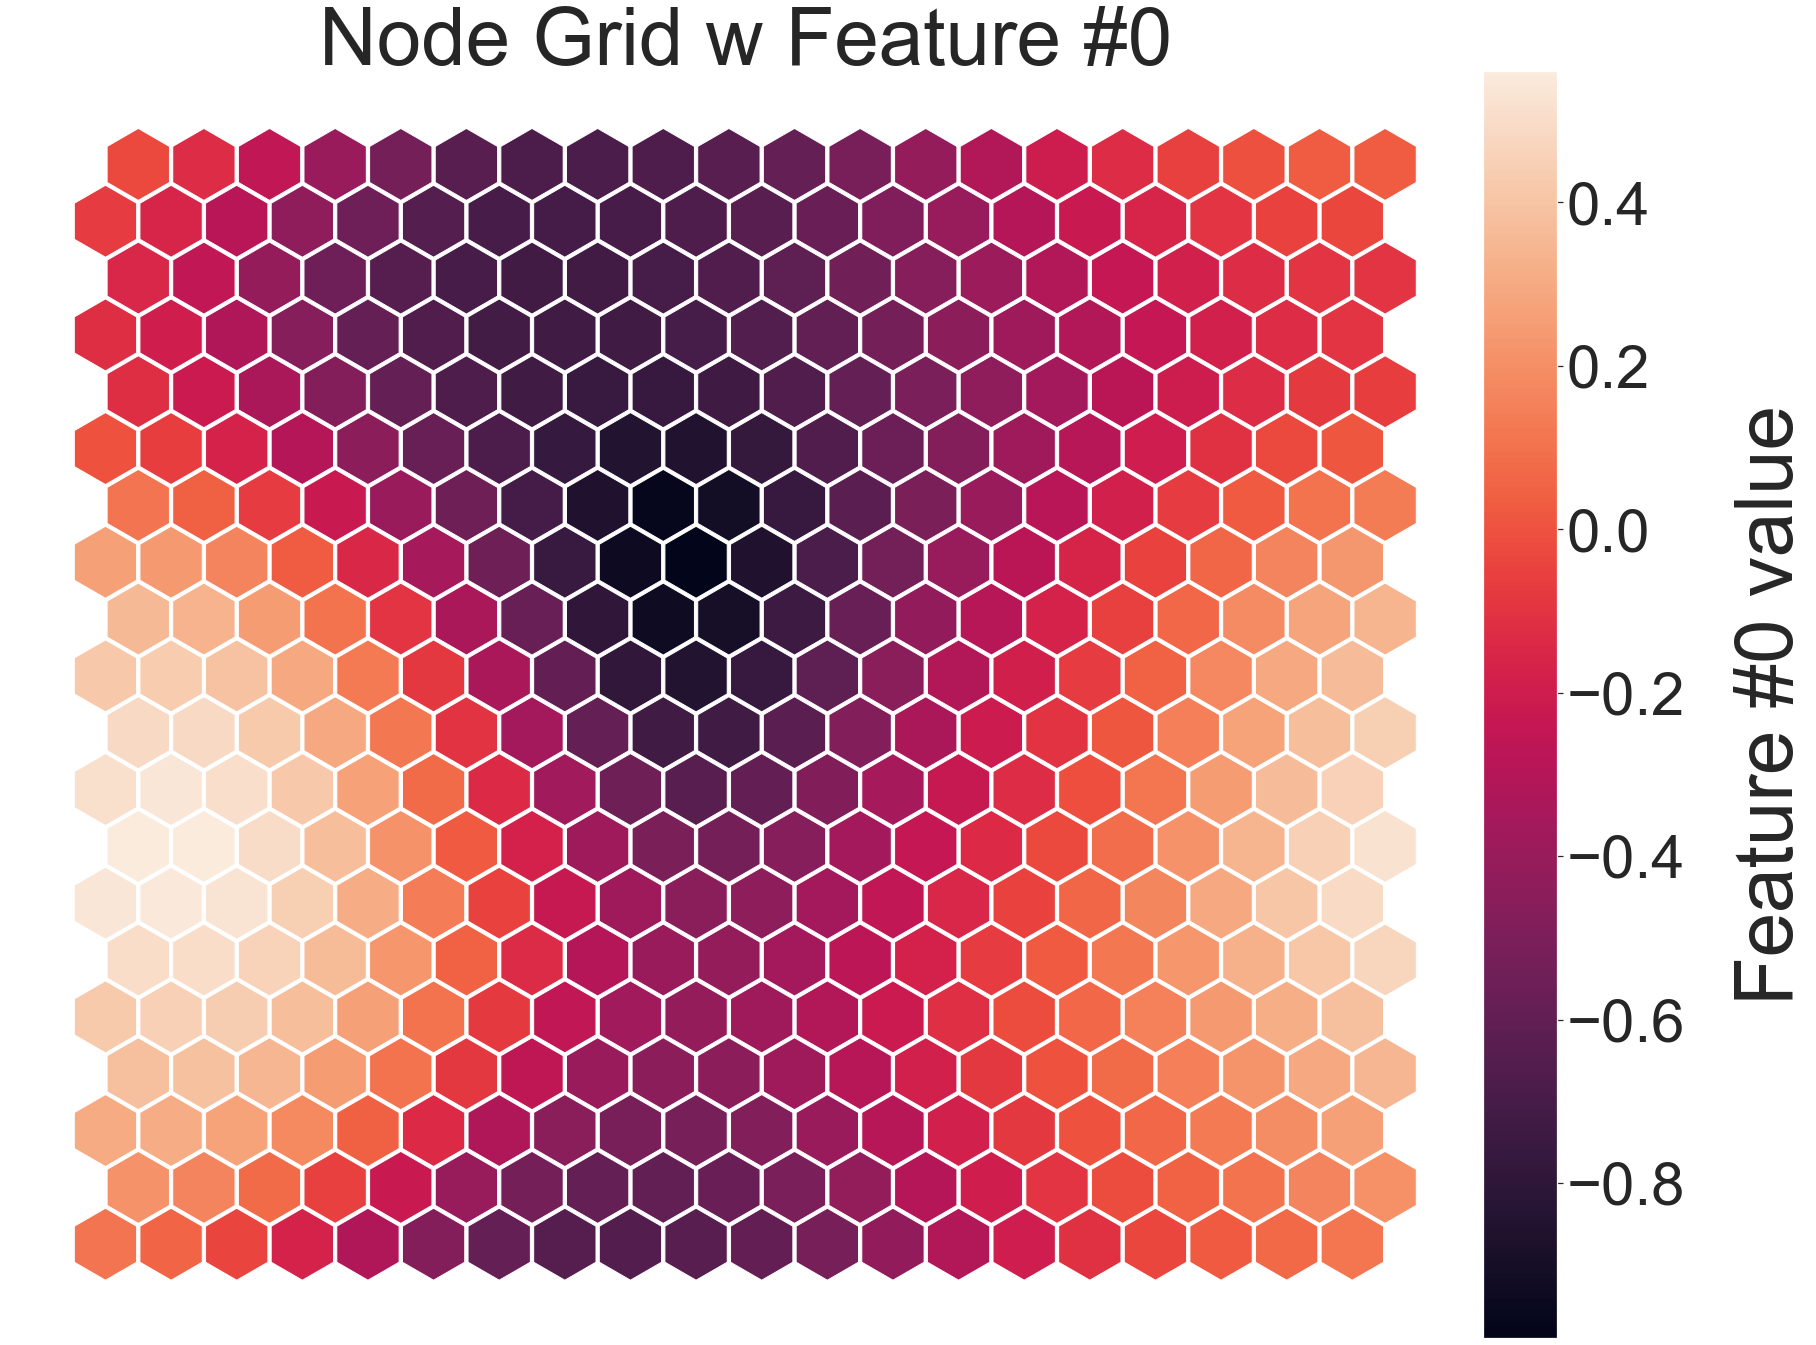

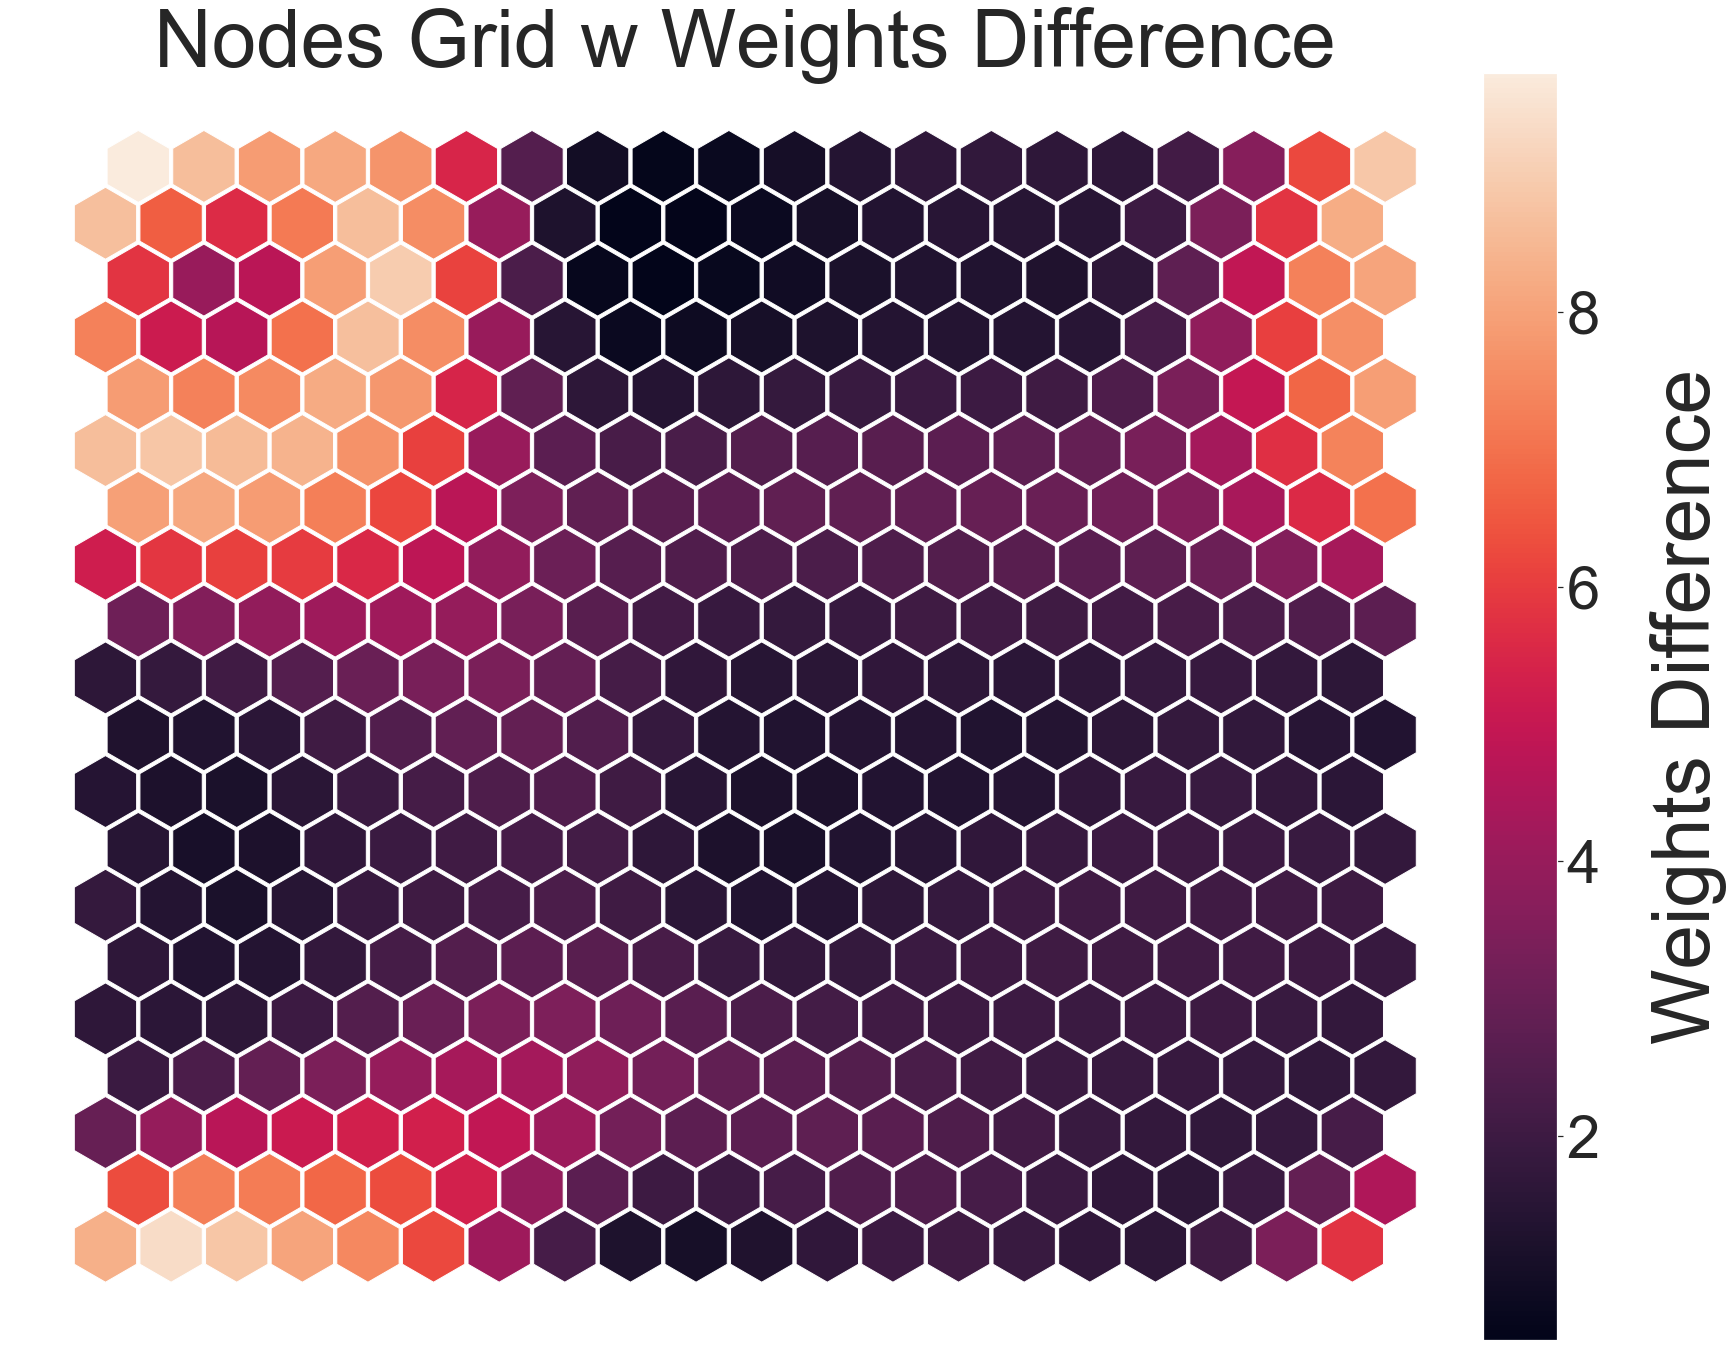

In [13]:
netAnormal.nodes_graph(colnum=0, path=fig_path)
netAnormal.diff_graph(path=fig_path)

## Drifted Daten

In [14]:
fn = os.path.join(data_path, 'drifted_data_y_2023.h5')
drifted_data = pd.read_hdf(fn, key='df')

In [17]:
cols = [s for s in drifted_data.columns if "loading" in s]
print(cols)

['line_1_1_loading', 'line_2_3_loading', 'line_3_4_loading', 'line_4_5_loading', 'line_5_6_loading', 'line_7_8_loading', 'line_8_9_loading', 'line_9_10_loading', 'line_10_11_loading', 'line_3_8_loading', 'line_12_13_loading', 'line_13_14_loading', 'line_6_7_loading', 'line_11_14_loading', 'line_14_8_loading', 'trafo_0_loading', 'trafo_1_loading']


In [18]:
drifted_data = drifted_data[cols].copy()

In [19]:
scaled_drifted = scaler_train.transform(drifted_data.to_numpy())

In [21]:
netDrifted = sps.somNet(20, 20, scaled_drifted, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


In [23]:
netDrifted.train(0.01, 10000)

Training SOM... done!


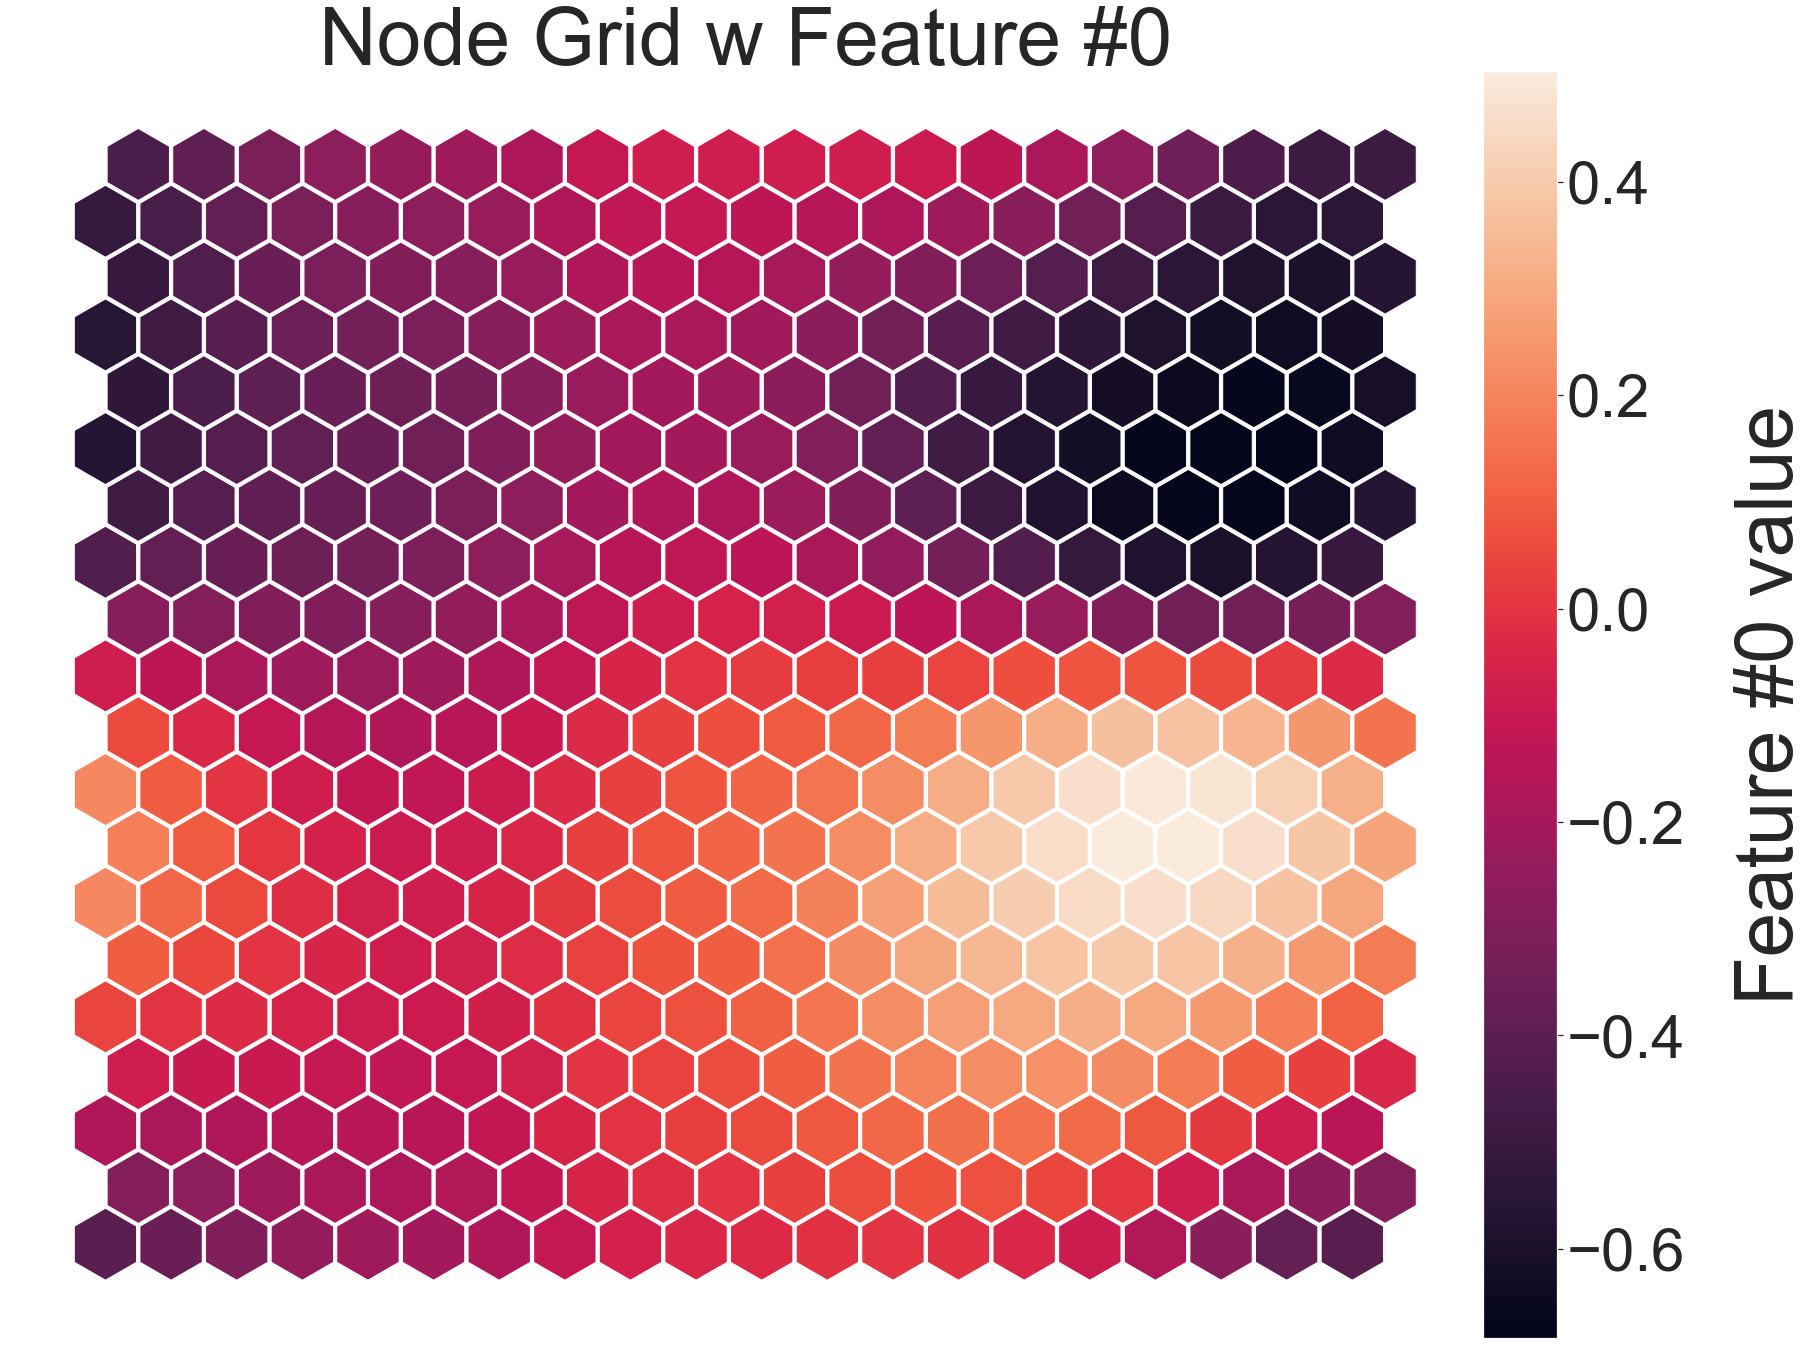

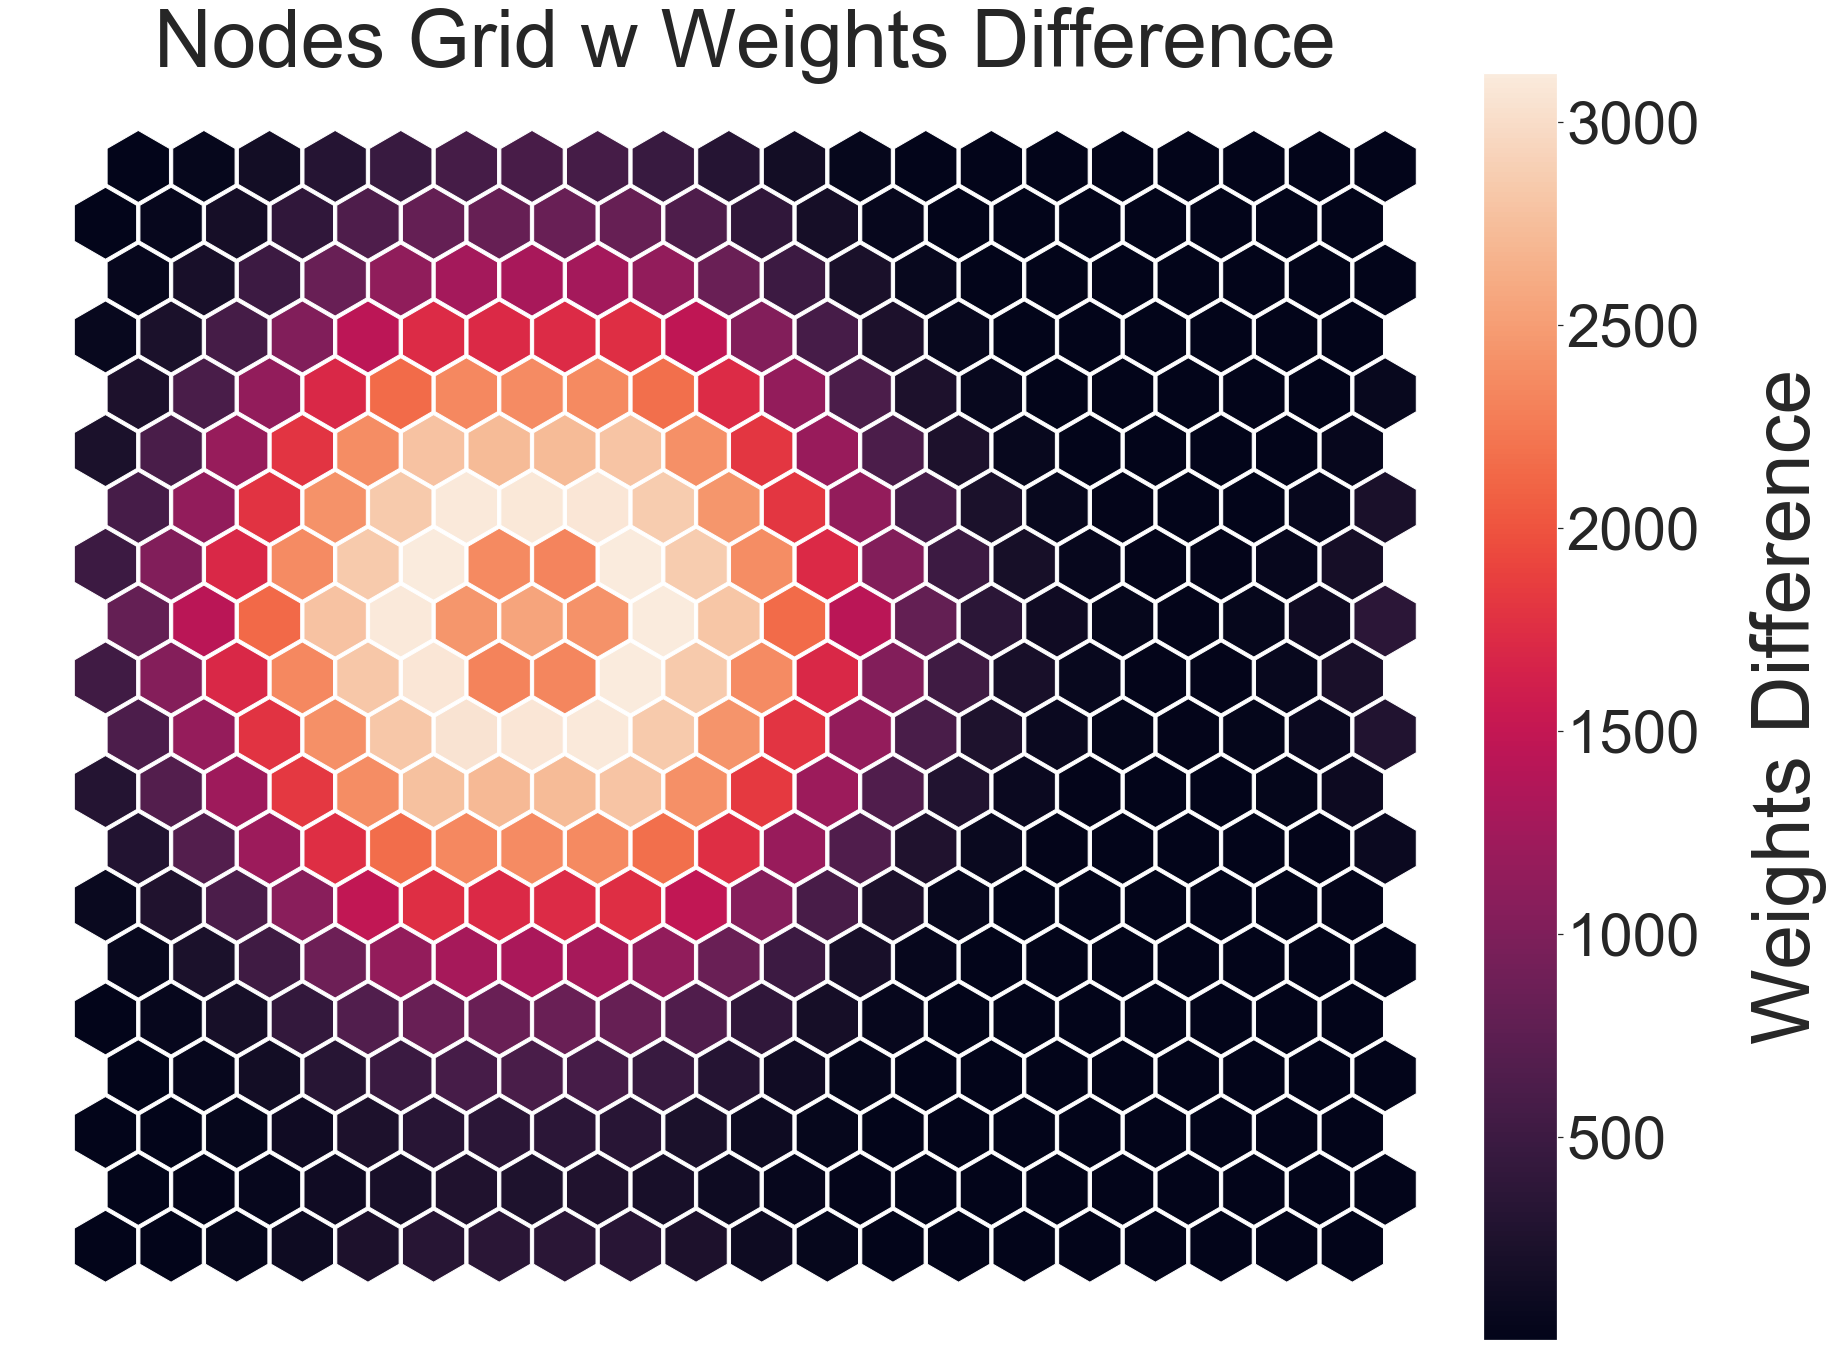

In [26]:
netDrifted.nodes_graph(colnum=0, path=fig_path)
netDrifted.diff_graph(path=fig_path)